### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
ds = pd.read_csv('data/coupons.csv')

In [5]:
ds.head()



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
print(ds.isnull())
print(ds.isnull().sum())

       destination  passanger  weather  temperature   time  coupon  \
0            False      False    False        False  False   False   
1            False      False    False        False  False   False   
2            False      False    False        False  False   False   
3            False      False    False        False  False   False   
4            False      False    False        False  False   False   
...            ...        ...      ...          ...    ...     ...   
12679        False      False    False        False  False   False   
12680        False      False    False        False  False   False   
12681        False      False    False        False  False   False   
12682        False      False    False        False  False   False   
12683        False      False    False        False  False   False   

       expiration  gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0           False   False  False          False  ...        False       True   

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#Drop column Cars 
ds.drop(columns=['car'], inplace=True)

#Replace other values with Mode
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    ds[column].fillna(ds[column].mode()[0], inplace=True)
    
# Check for missing values again
missing_values_after = ds.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [13]:
pp_accepted = ds['Y'].sum()/ds.shape[0]
print("Proportion accepted the coupon:", pp_accepted)

Proportion accepted the coupon: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

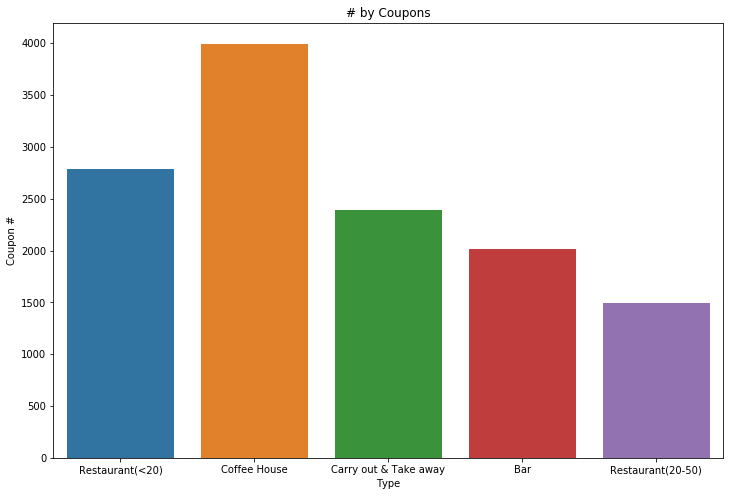

In [8]:
import matplotlib.pyplot as plt

# Bar plot for the Coupon
plt.figure(figsize=(12, 8))
sns.countplot(x='coupon', data=ds)
plt.title('# by Coupons')
plt.xlabel('Type')
plt.ylabel('Coupon #')
plt.show()

6. Use a histogram to visualize the temperature column.

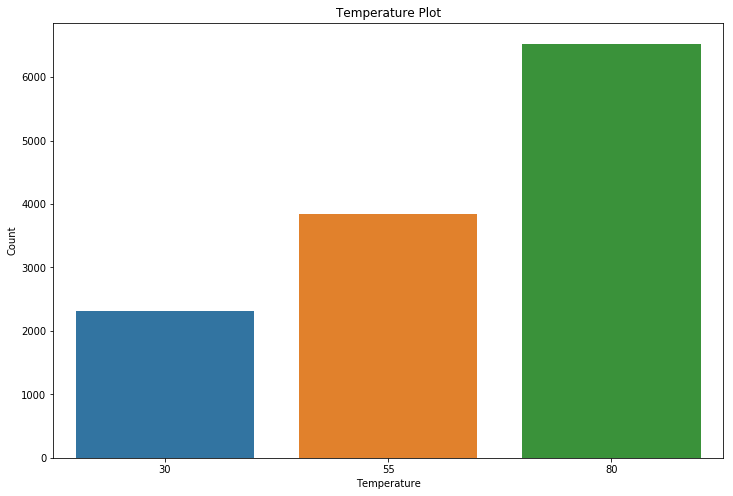

In [9]:
# Bar plot for the Temperature
plt.figure(figsize=(12, 8))
sns.countplot(x='temperature', data=ds)
plt.title('Temperature Plot')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
# DataFrame: bar coupons
bar_df = ds[ds['coupon'] == 'Bar']
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [11]:
bar_coupon_accepted = bar_df['Y'].mean()
print(f"Bar coupons accepted: {bar_coupon_accepted:.2%}")

Bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Less than 3:  0.37073707370737075
Greater than 3:  0.7688442211055276


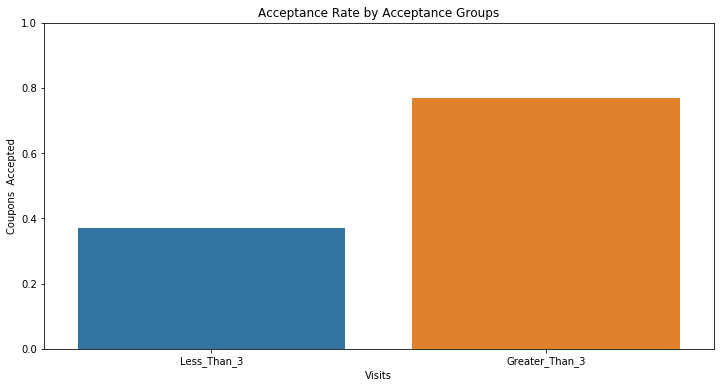

In [12]:
#Building dataframes for Less than 3 and greater than 3 Bar Coupons
less3_bar = bar_df[bar_df['Bar'].isin(['never', 'less1', '1~3'])]
great3_bar = bar_df[bar_df['Bar'].isin(['4~8', 'gt8'])]

#Acceptance of bar coupons
bar_coupon_accepted_l3 =  less3_bar['Y'].mean()
bar_coupon_accepted_g3 =  great3_bar['Y'].mean()
print("Less than 3: ", bar_coupon_accepted_l3)
print("Greater than 3: ", bar_coupon_accepted_g3)


# Bar plot for the Less than 3 and Greater than 3
compare_bar = pd.DataFrame({
    'Accept_Group': ['Less_Than_3', 'Greater_Than_3'],
    'Accept_Rate': [bar_coupon_accepted_l3, bar_coupon_accepted_g3]
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Accept_Group', y='Accept_Rate', data=compare_bar)
plt.title('Acceptance Rate by Acceptance Groups')
plt.ylabel('Coupons  Accepted')
plt.xlabel('Visits')
plt.ylim(0, 1)
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
# Create dataset by driver age
driver_gt25 = bar_df[(bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['age'] > '25')]
acceptance_gt25 = driver_gt25['Y'].mean()
print(f"Driver >25, more than once a month: Acceptance Rate: {acceptance_gt25:.2%}")


driver_others = bar_df[(bar_df['Bar'].isin([ 'never', 'less1'])) & (bar_df['age'] <= '25')]
acceptance_others = driver_others['Y'].mean()
print(f"Driver <=25, less than once a month: Acceptance Rate: {acceptance_others:.2%}")



Driver >25, more than once a month: Acceptance Rate: 68.84%
Driver <=25, less than once a month: Acceptance Rate: 38.65%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [14]:
# Create dataset by driver without kid
driver_wokids = bar_df[(bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['passanger'] != 'Kid(s)') &(~bar_df['occupation'].isin(['Farming Fishing & Forestry']))]
acceptance_woKid = driver_wokids['Y'].mean()
print(f"Driver without kid, Occupation not farming, etc: Acceptance Rate: {acceptance_woKid:.2%}")

# Create dataset by driver with kid
driver_wkids = bar_df[(bar_df['Bar'].isin([ 'never', 'less1'])) & (bar_df['passanger'] == 'Kid(s)') &(bar_df['occupation'].isin(['Farming Fishing & Forestry']))]
acceptance_wKid = driver_wkids['Y'].mean()
print(f"Driver with kid, Occupation farming, etc: Acceptance Rate: {acceptance_wKid:.2%}")



Driver without kid, Occupation not farming, etc: Acceptance Rate: 71.32%
Driver with kid, Occupation farming, etc: Acceptance Rate: 33.33%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance: No Kid, Not Widowed, more than once a month: 71.32%
Acceptance: Less than 30, more than once a month: 73.13%
Acceptance: Incone below 50K, 4 times Cheap Restaurant: 45.61%


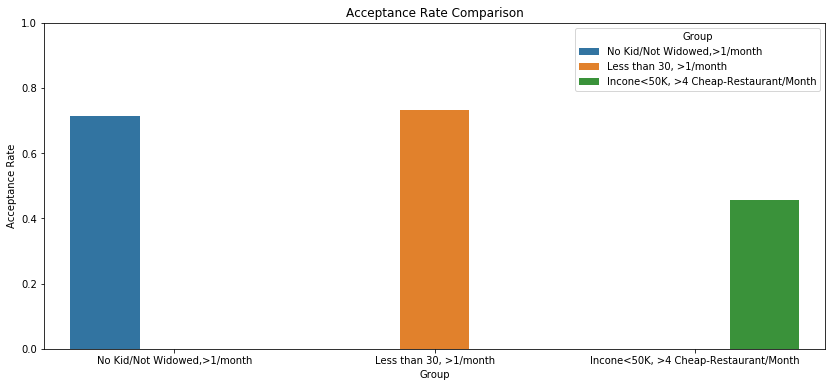

In [18]:
# Building comparison groups
d_nokid_noWid = bar_df[((bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['passanger'] != 'Kid(s)') & (bar_df['maritalStatus'] != 'Widowed'))]
ar_d_nokid_noWid = d_nokid_noWid['Y'].mean()

under_30 = bar_df[((bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['age'] < '30'))]
ar_under_30 = under_30['Y'].mean()

less_50_4rest = bar_df[((bar_df['income'] < '$50000') & (bar_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])))]
ar_less_50_4rest = less_50_4rest['Y'].mean()

print(f"Acceptance: No Kid, Not Widowed, more than once a month: {ar_d_nokid_noWid:.2%}")
print(f"Acceptance: Less than 30, more than once a month: {ar_under_30:.2%}")
print(f"Acceptance: Incone below 50K, 4 times Cheap Restaurant: {ar_less_50_4rest:.2%}")


# Create a bar plot to visualize the comparison
AR_Groups = pd.DataFrame({
    'Group': [
        'No Kid/Not Widowed,>1/month', 
        'Less than 30, >1/month', 
        'Incone<50K, >4 Cheap-Restaurant/Month'
    ],
    'Acceptance Rate': [
        ar_d_nokid_noWid, 
        ar_under_30, 
        ar_less_50_4rest
    ]
})

plt.figure(figsize=(14, 6))
sns.barplot(x='Group', y='Acceptance Rate', hue='Group', data=AR_Groups)
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.show()




7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [54]:
#Okay, so after going through all that analysis stuff we looked at earlier, here's what I think about the Bar coupon acceptance criteria:
#Only about 4 out of 10 people are down for bar coupons. (That's like 41%)
#If you're a regular at bars, you're more likely to take a coupon compared to those who don't go as often.
#People over 25 who go to bars a lot are more into coupons (70% of them).
#Drivers without kids and with no window preference are more likely to grab a coupon.
#Drivers heading to a cheap restaurant and your income is under 50K, coupons acceptance is below 50%


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [21]:
coffee_ds = ds[ds['coupon'] == 'Coffee House']
coffee_ds.head()
print(f"Total Records 'Coffee House': {coffee_ds.shape[0]}")

Total Records 'Coffee House': 3996


Coffee Coupon Acceptance Rate: 49.92%
Coffee Coupon Acceptance Rate by Time
time
10AM    0.640712
10PM    0.424242
2PM     0.547859
6PM     0.412626
7AM     0.445783
Name: Y, dtype: float64


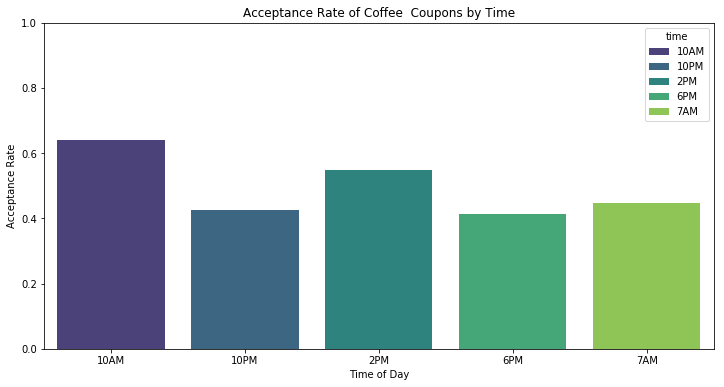

In [31]:
# Coffee Coupons acceptance rates
cc_ar = coffee_ds['Y'].mean()
print(f"Coffee Coupon Acceptance Rate: {cc_ar:.2%}")

# Coffee Coupons acceptance rates based on Time
cc_ar_time = coffee_ds.groupby('time')['Y'].mean()
print("Coffee Coupon Acceptance Rate by Time")
print(cc_ar_time)

# Bar plot acceptance rates by time of day
plt.figure(figsize=(12, 6))
sns.barplot(x=cc_ar_time.index, y=cc_ar_time.values, hue=cc_ar_time.index, palette="viridis", dodge=False)
plt.title('Acceptance Rate of Coffee  Coupons by Time')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()


Coffee Coupon Acceptance Rate by Distination
time
10AM    0.640712
10PM    0.424242
2PM     0.547859
6PM     0.412626
7AM     0.445783
Name: Y, dtype: float64


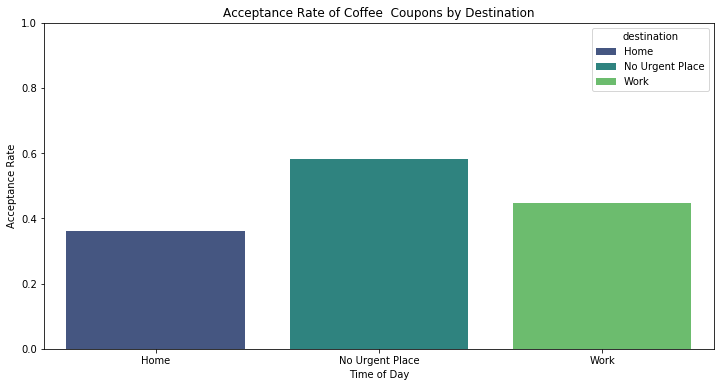

In [32]:
# Coffee Coupons acceptance rates based on Distination
cc_ar_destination = coffee_ds.groupby('destination')['Y'].mean()
print("Coffee Coupon Acceptance Rate by Distination")
print(cc_ar_time)

# Bar plot acceptance rates by time of day
plt.figure(figsize=(12, 6))
sns.barplot(x=cc_ar_destination.index, y=cc_ar_destination.values, hue=cc_ar_destination.index, palette="viridis", dodge=False)
plt.title('Acceptance Rate of Coffee  Coupons by Destination')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()


Coffee Coupon Acceptance Rate by Distination
destination      time
Home             10PM    0.284974
                 6PM     0.382313
No Urgent Place  10AM    0.640712
                 10PM    0.682692
                 2PM     0.547859
                 6PM     0.474860
Work             7AM     0.445783
Name: Y, dtype: float64


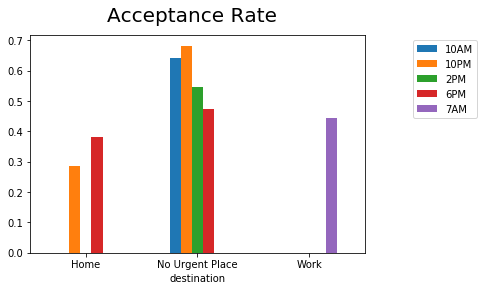

In [61]:

# Coffee Coupons acceptance rates based on Time-Distination
cc_ar_time_destination = coffee_ds.groupby(['destination','time'])['Y'].mean()
print("Coffee Coupon Acceptance Rate by Distination")
print(cc_ar_time_destination)

ds2 = cc_ar_time_destination.unstack()
ds2


ax = ds2.plot.bar(rot=0)
ax.get_figure().suptitle(t='Acceptance Rate: Coffee Coupon by Destination & Time', fontsize=20)
ax.legend(bbox_to_anchor=(1.35, 1.0));

In [ ]:
# Coffee Coupons are mostly accepted during No Urgent Place Destination
# Coffee Coupons are acceptance rate are higher in the morning and evening
# Coffee Coupons are least accpeted when destination is home 